In [51]:
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy as sci
import scipy.special as scisp
import scipy.stats as scist
import datetime, copy, imp
import re
import sys


import MySQLdb

import pymysql.cursors;

from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D

tqdm.pandas()
plt.ion()

### Exercise 1: Load Data

In [92]:
events = pd.read_hdf('~/data/baseball/Season-2018.hd5')

In [93]:
events

Time HomeTeam AwayTeam  Inning TopBottom  \
GameId                                                                     
ANA201804020 0   2018-04-02 12:00:00      ANA      CLE       1       Top   
             1   2018-04-02 12:00:00      ANA      CLE       1       Top   
             2   2018-04-02 12:06:00      ANA      CLE       1       Top   
             3   2018-04-02 12:06:00      ANA      CLE       1       Top   
             4   2018-04-02 12:12:00      ANA      CLE       1       Top   
...                              ...      ...      ...     ...       ...   
WAS201809260 126 2018-09-26 18:48:00      WAS      MIA       7    Bottom   
             127 2018-09-26 18:48:00      WAS      MIA       7    Bottom   
             128 2018-09-26 18:54:00      WAS      MIA       7    Bottom   
             129 2018-09-26 18:54:00      WAS      MIA       7    Bottom   
             130 2018-09-26 18:54:00      WAS      MIA       7    Bottom   

                  HomeScore  AwayScore  PlayerId     Position PlayerTeam  \
GameId                                                                     
ANA201804020 0            0          0  lindf001       Batter        CLE   
             1            0          0  troum001  CenterField        ANA   
             2            0          0  kipnj001       Batter        CLE   
             3            0          0  martj007    FirstBase        ANA   
             4            0          0  ramij003       Batter        CLE   
...                     ...        ...       ...          ...        ...   
WAS201809260 126          8          3  roblv001       Batter        WAS   
             127          8          3  rojam002    ShortStop        MIA   
             128          8          3  turnt001       Batter        WAS   
             129          8          3  rojam002    ShortStop        MIA   
             130          8          3  bostc001   SecondBase        MIA   

                   Event  PitchCount  Rbi  StartBase  EndBase  Outs  Players  
GameId                                                                        
ANA201804020 0    PutOut         5.0  NaN        NaN      NaN   NaN      NaN  
             1       Out         NaN  NaN        NaN      NaN   1.0      1.0  
             2    PutOut         4.0  NaN        NaN      NaN   NaN      NaN  
             3       Out         NaN  NaN        NaN      NaN   1.0      2.0  
             4    PutOut         6.0  NaN        NaN      NaN   NaN      NaN  
...                  ...         ...  ...        ...      ...   ...      ...  
WAS201809260 126  PutOut         4.0  NaN        NaN      NaN   NaN      NaN  
             127     Out         NaN  NaN        NaN      NaN   1.0      1.0  
             128  PutOut         3.0  NaN        NaN      NaN   NaN      NaN  
             129     Out         NaN  NaN        NaN      NaN   1.0      2.0  
             130     Out         NaN  NaN        NaN      NaN   1.0      2.0  

[349310 rows x 17 columns]

### Exercise 2: String Manipulation
- Learning Objectives: Add a new column, manipulate string and date fields.

In [94]:
events['LongGameId'] = events.HomeTeam + events.AwayTeam + events.Time.dt.strftime('%Y%m%d')

In [96]:
firstGameMins = [ x*6 for x in range(0,10) ]
secondGameMins = [ (x*6+1) for x in range(0,10) ]
thirdGameMins = [ (x*6+2) for x in range(0,10) ]

firstGames = events.Time.dt.minute.isin(firstGameMins)
events.loc[firstGames,'LongGameId'] += '00'

secondGames = events.Time.dt.minute.isin(secondGameMins)
events.loc[secondGames,'LongGameId'] += '01'

thirdGames = events.Time.dt.minute.isin(thirdGameMins)
events.loc[thirdGames,'LongGameId'] += '00'

In [97]:
events

Time HomeTeam AwayTeam  Inning TopBottom  \
GameId                                                                     
ANA201804020 0   2018-04-02 12:00:00      ANA      CLE       1       Top   
             1   2018-04-02 12:00:00      ANA      CLE       1       Top   
             2   2018-04-02 12:06:00      ANA      CLE       1       Top   
             3   2018-04-02 12:06:00      ANA      CLE       1       Top   
             4   2018-04-02 12:12:00      ANA      CLE       1       Top   
...                              ...      ...      ...     ...       ...   
WAS201809260 126 2018-09-26 18:48:00      WAS      MIA       7    Bottom   
             127 2018-09-26 18:48:00      WAS      MIA       7    Bottom   
             128 2018-09-26 18:54:00      WAS      MIA       7    Bottom   
             129 2018-09-26 18:54:00      WAS      MIA       7    Bottom   
             130 2018-09-26 18:54:00      WAS      MIA       7    Bottom   

                  HomeScore  AwayScore  PlayerId     Position PlayerTeam  \
GameId                                                                     
ANA201804020 0            0          0  lindf001       Batter        CLE   
             1            0          0  troum001  CenterField        ANA   
             2            0          0  kipnj001       Batter        CLE   
             3            0          0  martj007    FirstBase        ANA   
             4            0          0  ramij003       Batter        CLE   
...                     ...        ...       ...          ...        ...   
WAS201809260 126          8          3  roblv001       Batter        WAS   
             127          8          3  rojam002    ShortStop        MIA   
             128          8          3  turnt001       Batter        WAS   
             129          8          3  rojam002    ShortStop        MIA   
             130          8          3  bostc001   SecondBase        MIA   

                   Event  PitchCount  Rbi  StartBase  EndBase  Outs  Players  \
GameId                                                                         
ANA201804020 0    PutOut         5.0  NaN        NaN      NaN   NaN      NaN   
             1       Out         NaN  NaN        NaN      NaN   1.0      1.0   
             2    PutOut         4.0  NaN        NaN      NaN   NaN      NaN   
             3       Out         NaN  NaN        NaN      NaN   1.0      2.0   
             4    PutOut         6.0  NaN        NaN      NaN   NaN      NaN   
...                  ...         ...  ...        ...      ...   ...      ...   
WAS201809260 126  PutOut         4.0  NaN        NaN      NaN   NaN      NaN   
             127     Out         NaN  NaN        NaN      NaN   1.0      1.0   
             128  PutOut         3.0  NaN        NaN      NaN   NaN      NaN   
             129     Out         NaN  NaN        NaN      NaN   1.0      2.0   
             130     Out         NaN  NaN        NaN      NaN   1.0      2.0   

                        LongGameId  
GameId                              
ANA201804020 0    ANACLE2018040200  
             1    ANACLE2018040200  
             2    ANACLE2018040200  
             3    ANACLE2018040200  
             4    ANACLE2018040200  
...                            ...  
WAS201809260 126  WASMIA2018092600  
             127  WASMIA2018092600  
             128  WASMIA2018092600  
             129  WASMIA2018092600  
             130  WASMIA2018092600  

[349310 rows x 18 columns]

### Exercise 3: Basic Column Calculations
- Learning Objectives: Use columns to calculate basic statistics.

In [135]:
# Average times/game each fielder is involved in putting someone out.
fielders = events.Position.unique()
fielders = fielders[(fielders != 'Batter') & (fielders != 'Runner')]

In [136]:
avgOuts = { key: 0 for key in fielders }

for fielder in fielders:
    nGames = len(events[events.Position == fielder].LongGameId.drop_duplicates())
    avgOuts[fielder] = len(events[(events.Position == fielder) & (events.Event == 'Out')])/nGames

avgOuts

{'CenterField': 4.907139909203467,
 'FirstBase': 16.25551921504497,
 'Catcher': 1.201000834028357,
 'SecondBase': 7.1651639344262295,
 'LeftField': 3.7749263777871267,
 'ShortStop': 6.7841048750512085,
 'RightField': 3.9416180150125104,
 'ThirdBase': 4.7765869744435285}

In [137]:
# Average on base (hit+walks), RBIs and runs scored per at bat.

In [147]:
nAtBat = len(events[events.Position == 'Batter'])
avgOnBase =  len(events[ (events.Event == 'Hit') | (events.Event == 'Walk') ])/nAtBat
avgRuns = len(events[ events.EndBase == 4 ])/nAtBat
avgRbis = events[events.Event == 'Hit'].Rbi.sum()/nAtBat

print('Avg On Base: %g, Avg Runs: %g, Avg RBIs: %g' % (avgOnBase, avgRuns, avgRbis))

Avg On Base: 0.320355, Avg Runs: 0.11806, Avg RBIs: 0.0700041


### Exercise 4: Grouping by Key
- Learning Objectives: Use `groupby()` on game and player ID strings to produce summaries for each.

#### Summarize Players

In [169]:
def SummarizePlayer(tbl):
    nGames = len(tbl.LongGameId.drop_duplicates())
    nAtBats = sum(tbl.Position == 'Batter') + 1e-300
    avgOuts = sum(tbl.Event == 'Out')/nGames
    avgOnBase = sum( (tbl.Event == 'Hit') | (tbl.Event == 'Walk') )/nAtBats
    avgRuns = sum( tbl.EndBase == 4 )/nAtBats
    avgRbis = tbl.Rbi.sum()/nAtBats
    
    fieldPositions = tbl[(tbl.Position != 'Batter') & (tbl.Position != 'Runner')].Position
    
    if len(fieldPositions) > 0:
        position = fieldPositions.mode().iloc[0]
    else:
        position = 'Pitcher'
        
    return pd.Series({
        'Position': position,
        'GamesPlayed': nGames,
        'AtBats': nAtBats,
        'AvgOuts': avgOuts,
        'AvgOnBase': avgOnBase,
        'AvgRuns': avgRuns,
        'AvgRbis': avgRbis
    })
    
    
#SummarizePlayer(events[events.PlayerId == 'bostc001'])    
players = events.groupby('PlayerId').apply(SummarizePlayer)   

In [170]:
players

,Position,GamesPlayed,AtBats,AvgOuts,AvgOnBase,AvgRuns,AvgRbis
PlayerId,,,,,,,
abrej003,FirstBase,129,549.0,7.139535,0.327869,0.123862,0.078324
acunr001,LeftField,111,484.0,1.657658,0.367769,0.161157,0.070248
adaml001,LeftField,24,28.0,0.375000,0.357143,0.357143,0.142857
adamm002,FirstBase,117,332.0,3.658120,0.313253,0.126506,0.108434
adamw002,ShortStop,85,320.0,2.882353,0.350000,0.134375,0.059375
...,...,...,...,...,...,...,...
zimmb001,CenterField,36,114.0,2.277778,0.280702,0.122807,0.052632
zimmj003,Pitcher,2,2.0,0.000000,0.000000,0.000000,0.000000
zimmr001,FirstBase,85,318.0,6.541176,0.342767,0.103774,0.103774


#### Summarize Games

In [107]:
def SummarizeGame(tbl):

    homeFinal = tbl.HomeScore.tail(1).iloc[0]
    awayFinal = tbl.AwayScore.tail(1).iloc[0]
    homeTeam = tbl.HomeTeam.tail(1).iloc[0]
    awayTeam = tbl.AwayTeam.tail(1).iloc[0]
    
    if homeFinal > awayFinal:
        winner = homeTeam
        loser = awayTeam
        winScore = tbl.HomeScore
        loseScore = tbl.AwayScore
    else:
        winner = awayTeam
        loser = homeTeam
        winScore = tbl.AwayScore
        loseScore = tbl.HomeScore
            
    lead = winScore - loseScore
            
    return pd.Series({
        'HomeTeam': homeTeam,
        'AwayTeam': awayTeam,
        'Winner': winner,
        'Loser': loser,
        'WinFinal': winScore.max(),
        'LoseFinal': loseScore.max(),
        'WinMinLead': lead.min(),
        'WinMaxLead': lead.max(),
        'Innings': tbl.Inning.max()
    })
    
    
games = events.groupby('GameId').apply(SummarizeGame)    

In [108]:
games

,HomeTeam,AwayTeam,Winner,Loser,WinFinal,LoseFinal,WinMinLead,WinMaxLead,Innings
GameId,,,,,,,,,
ANA201804020,ANA,CLE,CLE,ANA,6,0,0,6,9
ANA201804030,ANA,CLE,ANA,CLE,13,2,-2,11,9
ANA201804040,ANA,CLE,ANA,CLE,3,2,-2,1,13
ANA201804060,ANA,OAK,ANA,OAK,13,9,-6,4,9
ANA201804070,ANA,OAK,OAK,ANA,7,3,0,4,9
...,...,...,...,...,...,...,...,...,...
WAS201809220,WAS,NYN,WAS,NYN,6,0,0,6,9
WAS201809230,WAS,NYN,NYN,WAS,8,6,-2,5,9
WAS201809240,WAS,MIA,WAS,MIA,7,3,-1,5,9


### Exercise 5: Histograms
- Learning Objectives: Create and plot histograms.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13cd4c850>]],
      dtype=object)

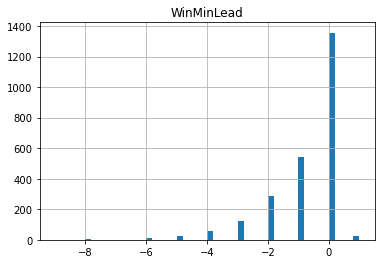

In [112]:
games.hist(column = [ 'WinMinLead' ], bins = 50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11530cd90>]],
      dtype=object)

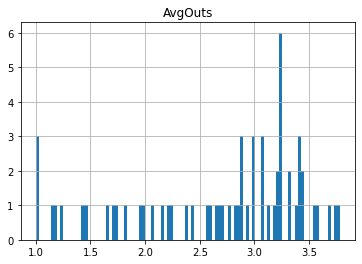

In [172]:
players[players.Position == 'ShortStop'].hist(column = [ 'AvgOuts' ], bins = 100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12f8f7290>]],
      dtype=object)

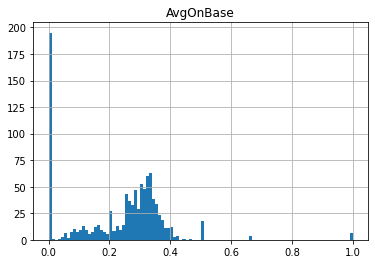

In [173]:
players.hist(column = [ 'AvgOnBase' ], bins = 100)

### Exercise 6: Individual Timelines
- Learning Objectives: Plot events for an individual versus time.

In [186]:
# Find the player with the highest on-base percentage of players with an above average number of at bats.
avgAtBats = players.AtBats.mean()
maxOnBasePlayer = players[players.AtBats > avgAtBats].AvgOnBase.idxmax()
maxOnBasePlayer

'troum001'

In [224]:
atBats = tbl.resample('M',on='Time').Event.count()

def CountUnique(ser):
    return len(ser.drop_duplicates())

nGames = tbl.resample('M',on='Time').LongGameId.apply(lambda x: len(x.drop_duplicates()))
singles = tbl[tbl.Event=='Hit'].resample('M',on='Time').EndBase.apply(lambda x: (x==1).sum())
doubles = tbl[tbl.Event=='Hit'].resample('M',on='Time').EndBase.apply(lambda x: (x==2).sum())
triples = tbl[tbl.Event=='Hit'].resample('M',on='Time').EndBase.apply(lambda x: (x==3).sum())
homers = tbl[tbl.Event=='Hit'].resample('M',on='Time').EndBase.apply(lambda x: (x==4).sum())
walks = tbl[tbl.Event=='Walk'].resample('M',on='Time').EndBase.count()

onBase = pd.DataFrame({
    'GamesPlayed': nGames,
    'Singles': singles,
    'Doubles': doubles,
    'Triples': triples,
    'Homers': homers,
    'Walks': walks
})




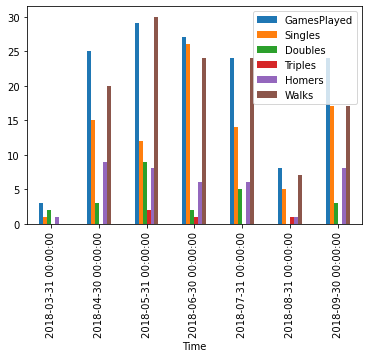

In [249]:
onBase.plot(kind='bar')


### Exercise 7: Correlation
- Learning Objectives: Learn tools to examine correlations in the data.

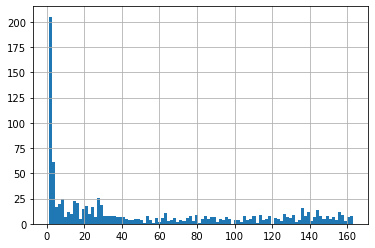

In [270]:
players.GamesPlayed.hist(bins=100)

In [261]:
nPlayers = len(players.index)
pct70 = players.GamesPlayed.sort_values().iloc[int(0.3*nPlayers)]
players70 = players[players.GamesPlayed >= pct70]

In [262]:
players70

,Position,GamesPlayed,AtBats,AvgOuts,AvgOnBase,AvgRuns,AvgRbis
PlayerId,,,,,,,
abrej003,FirstBase,129,549.0,7.139535,0.327869,0.123862,0.078324
acunr001,LeftField,111,484.0,1.657658,0.367769,0.161157,0.070248
adaml001,LeftField,24,28.0,0.375000,0.357143,0.357143,0.142857
adamm002,FirstBase,117,332.0,3.658120,0.313253,0.126506,0.108434
adamw002,ShortStop,85,320.0,2.882353,0.350000,0.134375,0.059375
...,...,...,...,...,...,...,...
youne003,CenterField,39,115.0,1.769231,0.252174,0.104348,0.043478
zimmb001,CenterField,36,114.0,2.277778,0.280702,0.122807,0.052632
zimmr001,FirstBase,85,318.0,6.541176,0.342767,0.103774,0.103774


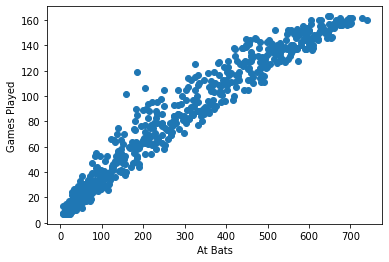

Correlation: 0.977389


In [275]:
plt.plot(players70.AtBats,players70.GamesPlayed,marker='o',ls='None')
plt.xlabel('At Bats')
plt.ylabel('Games Played')
plt.show()

print('Correlation: %g' % (np.corrcoef(players70.AtBats,players70.GamesPlayed)[0,1]))

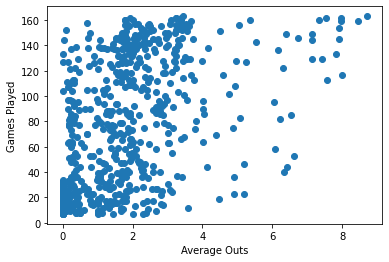

Correlation: 0.50417


In [276]:
plt.plot(players70.AvgOuts,players70.GamesPlayed,marker='o',ls='None')
plt.xlabel('Average Outs')
plt.ylabel('Games Played')
plt.show()

print('Correlation: %g' % (np.corrcoef(players70.AvgOuts,players70.GamesPlayed)[0,1]))

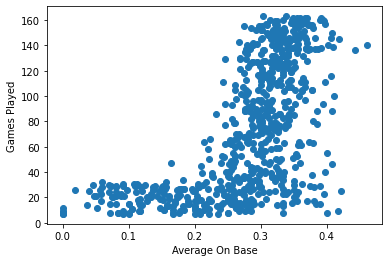

Correlation: 0.614981


In [277]:
plt.plot(players70.AvgOnBase,players70.GamesPlayed,marker='o',ls='None')
plt.xlabel('Average On Base')
plt.ylabel('Games Played')
plt.show()

print('Correlation: %g' % (np.corrcoef(players70.AvgOnBase,players70.GamesPlayed)[0,1]))

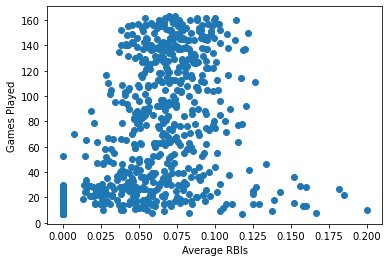

Correlation: 0.384203


In [278]:
plt.plot(players70.AvgRbis,players70.GamesPlayed,marker='o',ls='None')
plt.xlabel('Average RBIs')
plt.ylabel('Games Played')
plt.show()

print('Correlation: %g' % (np.corrcoef(players70.AvgRbis,players70.GamesPlayed)[0,1]))

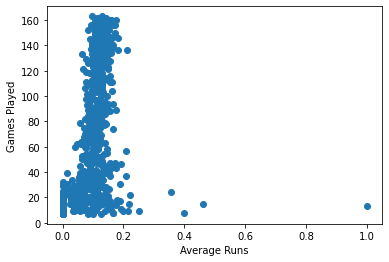

Correlation: 0.310017


In [279]:
plt.plot(players70.AvgRuns,players70.GamesPlayed,marker='o',ls='None')
plt.xlabel('Average Runs')
plt.ylabel('Games Played')
plt.show()

print('Correlation: %g' % (np.corrcoef(players70.AvgRuns,players70.GamesPlayed)[0,1]))